# GCC's ssc-cdi : tomography pipeline for Cateretê v0.1
 
- #### Questions? E-mail gcc@lnls.br
- #### Documentation about the ssc-cdi package: https://gcc.lnls.br/wiki/
- #### To use a test sample:
    - dic["sinogram_path"] = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/phantom_complex/phantom_complex.hdf5"

## Imports

In [ ]:
%matplotlib widget
import numpy as np, matplotlib.pyplot as plt
from sscCdi import read_data, define_paths, tomo_sort, tomo_crop, tomo_unwrap, tomo_equalize, preview_angle_projection, tomo_alignment, tomo_recon, tomo_equalize3D, deploy_visualizer, plot_histograms, clean_pwcdi_dataset

## Load dictionary

In [ ]:
dic = {} # or load from template file

## Load data

In [24]:
dic["recon_method"]  = "pwcdi" # ptycho or pwcdi
dic["contrast_type"] = "magnitude" # phase or magnitude
# dic["sinogram_path"] = "/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/data/pwcdi/CAT_logo_2D_frames/logo3Dcdi_0000_restoredtiago_even2_all.npy"
dic["sinogram_path"] = "/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/data/pwcdi/CAT_logo_2D_frames/logo3Dcdi_0000_restoredtiago_even2_all_cleaned.npy"
dic["angles_path"]   = "/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/data/pwcdi/CAT_logo_2D_frames/3Dcdilogo3Dcdi_Ry_positions.txt"

dic = define_paths(dic)

obj, angles = read_data(dic)
print(f"Object shape = {obj.shape} \t Number of angles: {angles.shape}")

Object shape = (525, 2771, 2771) 	 Number of angles: (525, 2)


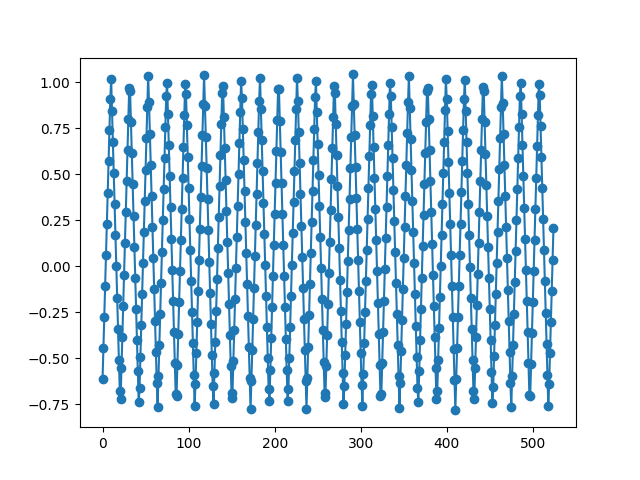

(array([10.        ,  1.01595191]), array([11.        ,  0.84651179]))

In [42]:
plt.figure()
plt.plot(angles[:,1],'o-')
plt.show()


In [23]:
inverted_frames = [1,12,20,21,30,32,50,53,55,64,67,72,73,75,76,85,86,87,89,91,95,99,107,108,109,115,116,117,120,121,126,128,129,133,138,141,146,150,151,154,160,164,169,174,175,176,180,185,190,193,195,198,203,211,216,223,228,229,232,235,238,241,245,246,255,258,259,260,267,268,271,272,274,277,279,281,285,288,290,294,298,301,302,310,314,315,320,322,323,324,328,334,336,337,342,344,346,347,348,349,353,354,358,359,363,365,366,368,371,372,375,376,379,380,385,387,388,390,391,392,393,396,401,402,404,408,409,416,418,419,422,427,431,432,433,441,444,445,452,455,459,461,467,473,474,476,481,483,485,487,488,490,491,495,497,498,506,509,513,516,518,520,522]
bad_frames = [0,1,4,8,9,10,11,12,15,19,20,21,25,31,32,34,41,42,43,44,50,51,52,53,54,55,56,63,64,65,66,73,74,75,76,84,85,86,94,96,97,98,106,107,108,117,118,119,129,130,138,139,140,150, 159, 160,161,162,171,172,173,177,181,182,183,184,192,194,204,205,215,216,225,226,227,237,248, 249,258,259,268,269,270,271,280,281,290,291,292,301,302,311,312,313,323,333,334,335,344,345,356,357,366,367,377,378,398,399,400,401,410,420,421,422,431,432,437,442,443,453,454,458,461,463,464,465,474,475,476,484,485,486,487,496,497,507,508,509,517,518,519]


def clean_pwcdi_dataset(input_path, inverted_frames, bad_frames,output_path):
    sinogram = np.load(input_path)

    for frame in inverted_frames:
        sinogram[frame] = sinogram[frame,::-1,::-1]
    for frame in bad_frames:
        sinogram[frame] = np.zeros_like(sinogram[0])

    np.save(output_path, sinogram)
    print("Saved data at: ",output_path)

In [ ]:
deploy_visualizer(obj,title='Original sinogram',cmap='gray')

In [ ]:
crop = obj[:,1600:-1400,1400:-1500]
deploy_visualizer(crop,title='Original sinogram',cmap='gray')

## Sort data

In [25]:
tomo_sort(dic,obj, angles)

Time elapsed: 20.00 s


In [ ]:
deploy_visualizer(np.load(dic["ordered_object_filepath"]),title="Ordered sinogram",cmap='gray')

## Crop

In [26]:
dic["top_crop"]    = 700
dic["bottom_crop"] = 800
dic["left_crop"]   = 1100
dic["right_crop"]  = 1100
tomo_crop(dic)

Cropped sinogram shape: (525, 1271, 571)
Time elapsed: 11.66 s


In [27]:
deploy_visualizer(np.load(dic["cropped_sinogram_filepath"]),title="Cropped sinogram",cmap='gray')

## Unwrap

In [ ]:
dic["bad_frames_before_unwrap"] = []
tomo_unwrap(dic)

In [ ]:
deploy_visualizer(np.load(dic["unwrapped_sinogram_filepath"]),title="Unwrapped sinogram",cmap='gray')

## 2D Equalization

In [28]:
dic["sinogram_to_equalize"] = 'cropped' # cropped or unwrapped
dic["bad_frames_before_equalization"] = []
dic["equalize_gradient"] = False
dic["equalize_global_offset"] = False
dic["equalize_invert"] = False
dic["equalize_local_offset"] = [0,100,0,100]
dic["equalize_outliers"] = 0

tomo_equalize(dic)

Sinogram shape to unwrap:  (525, 1271, 571)
Using 32 parallel processes


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 525/525 [00:02<00:00, 217.13it/s]


Min 	 Mean-3*sigma 	 Mean 	 Mean+3*sigma 	 Max 
Old  0.0 0.0 0.0 0.0 0.0
New  0.0 -311.76934814453125 30.945816 373.6609802246094 998.8544
Time elapsed: 9.40 s


In [29]:
deploy_visualizer(np.load(dic["equalized_sinogram_filepath"]),title="Equalized sinogram",cmap='gray')

In [ ]:
deploy_visualizer(np.load(dic["equalized_sinogram_filepath"]),title="Equalized sinogram",cmap='gray',axis=0,aspect_ratio='auto',limits=(0,2))

In [ ]:
deploy_visualizer(np.load(dic["equalized_sinogram_filepath"]),title="Equalized sinogram",cmap='gray',axis=1,aspect_ratio='auto')#,limits=(0,0.5))

## Alignment

In [33]:
dic["wiggle_sinogram_selection"] = dic["equalized_sinogram_filepath"]

In [59]:
dic["step_percentage"] = 100 # need to project irregular angle steps to a regular grid?
preview_angle_projection(dic)

Simulating projection of angles to regular grid...
Before+after frames added: 24966
Intermediate null frames : 0
                        + -----
Total null frames        : 24966
Frames being used        : 256  of  525
                        + -----
Projected Angles         : 25222


In [34]:
dic["project_angles_to_regular_grid"] = True
dic["CPUs"] = 32
dic["bad_frames_before_wiggle"] = [] 
dic["wiggle_reference_frame"] = 315
dic = tomo_alignment(dic)

ssc-radon: creating 25222x1271x571 shared arrays (tomogram)


OSError: [Errno 12] Cannot allocate memory

In [ ]:
deploy_visualizer(np.load(dic["wiggle_sinogram_filepath"]),title="Aligned sinogram",cmap='gray',axis=1)

## Tomography

In [ ]:
dic["GPUs"] = [0]
dic["tomo_algorithm"] = "EEM"
dic["tomo_iterations"] = 10
dic["tomo_regularization"] = False
dic["tomo_regularization_param"] = 0.001

recon3D = tomo_recon(dic)

In [ ]:
deploy_visualizer(np.load(dic["reconstruction_filepath"]),title="Recon",cmap='gray',axis=0)#,limits=(-1,1))

## 3D Equalization

In [ ]:
dic["tomo_remove_outliers"] = 0
dic["tomo_threshold"] = 15.0
dic["tomo_local_offset"] = []
dic["tomo_mask"] = []

tomo_equalize3D(dic)

In [ ]:
deploy_visualizer(np.load(dic["eq_reconstruction_filepath"]),title="Equalized Recon",cmap='gray',axis=0,limits)

In [ ]:
equalized_tomogram = np.load(dic["eq_reconstruction_filepath"])
plot_histograms(recon3D, equalized_tomogram,bins=300)